## Quick start with some modifications

In [1]:
import matplotlib.pyplot as plt 
import sys 
sys.path.append('../')

In [2]:
from wompth.models.base import NeuralNetwork

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms.transforms import ToTensor

In [4]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
train_loader =  DataLoader(training_data, batch_size=64)

/home/gorigan/anaconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
test_data = datasets.FashionMNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor(),
    )
test_loader = DataLoader(test_data, batch_size=64)

In [6]:
classes = [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot",
    ]

nn = NeuralNetwork(layout=[28 * 28, 256, 256, 10], class_labels=classes)

Using cuda device


In [7]:
nn.fit(
        train_loader=train_loader, test_loader=test_loader, epochs=10
    )


Epoch 1
-------------------------------
loss: 2.295100  [    0/60000]
loss: 2.287694  [ 6400/60000]
loss: 2.273732  [12800/60000]
loss: 2.275040  [19200/60000]
loss: 2.266656  [25600/60000]
loss: 2.243647  [32000/60000]
loss: 2.243919  [38400/60000]
loss: 2.216354  [44800/60000]
loss: 2.203306  [51200/60000]
loss: 2.214090  [57600/60000]
Test Error: 
 Accuracy: 32.2%, Avg loss: 2.186104 

Epoch 2
-------------------------------
loss: 2.185159  [    0/60000]
loss: 2.178073  [ 6400/60000]
loss: 2.136418  [12800/60000]
loss: 2.150880  [19200/60000]
loss: 2.127115  [25600/60000]
loss: 2.069271  [32000/60000]
loss: 2.091155  [38400/60000]
loss: 2.027617  [44800/60000]
loss: 2.016257  [51200/60000]
loss: 1.988839  [57600/60000]
Test Error: 
 Accuracy: 59.7%, Avg loss: 1.967722 

Epoch 3
-------------------------------
loss: 1.991647  [    0/60000]
loss: 1.967558  [ 6400/60000]
loss: 1.873463  [12800/60000]
loss: 1.898706  [19200/60000]
loss: 1.837729  [25600/60000]
loss: 1.767229  [32000/600

In [8]:
def print_predictions_mnist(result):
    figure, axes = plt.subplots(nrows=3, ncols=3)

    i = 0
    for row in axes: 
        for col in row:
            y = test_loader.dataset[i][1]
            X = test_loader.dataset[i][0]
            col.set_title(f'guess={result[i]}')
            col.imshow(X[0], cmap=plt.get_cmap('gray'))
            i += 1
    figure.tight_layout(pad=1.0)

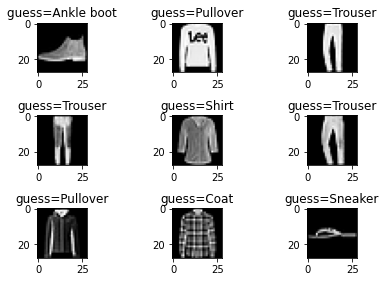

In [9]:
result = nn.predict(test_loader)
print_predictions_mnist(result)

In [10]:
path = 'model_nn.pth'
nn.save(path)


In [11]:
nn2 = NeuralNetwork()
nn2.load(path)

Using cuda device


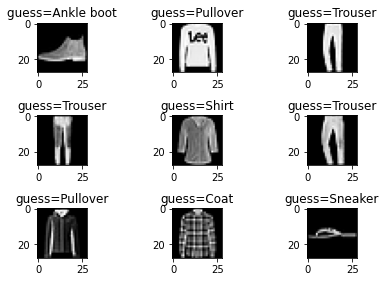

In [12]:
result = nn2.predict(test_loader)
print_predictions_mnist(result)